In [2]:
#Data wrangling
#Finding out missing data 
import pandas as pd 
import numpy as np 
from IPython.display import display 
import matplotlib.pyplot as plt 
%matplotlib inline 
read_train=pd.read_csv('train.csv') 
age=read_train['Age']
#finding out the number of rows in 'Age' without NaN
print len(age.dropna()) 
#finding out the number of rows with missing data print missing_data
missing_data= len(read_train)-len(age.dropna())
print missing_data


714
177


From the above code, I have just found out the number of missing values in the 'Age' column.I have not added any other value in the missing data column. 

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64


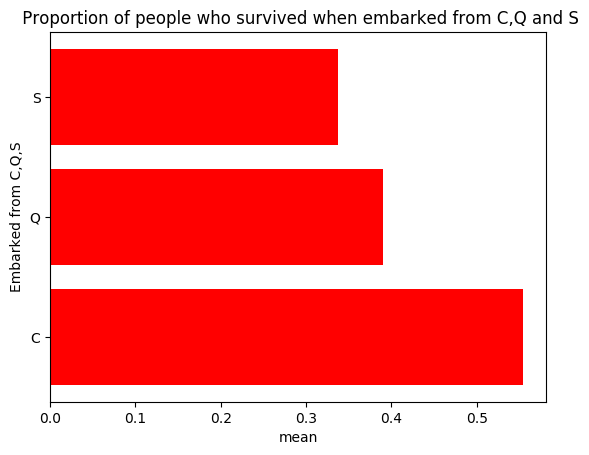

In [9]:
#Grouping the whole data by 'Embarked and finding out the mean and sum of the people who have survived according to 'C','Q' and 'S'
#Mean gives the proportion of people from 'C','Q','S' who have survived and it is represented in the plot
group_by_embarked_mean=read_train.groupby('Embarked').mean()['Survived']
print group_by_embarked_mean

grouping_by_survived_sum=read_train.groupby('Embarked')['Survived'].sum()
print grouping_by_survived_sum
C=group_by_embarked_mean.loc['C']
Q=group_by_embarked_mean.loc['Q']
S=group_by_embarked_mean.loc['S']
plt.rcdefaults()
fig, ax = plt.subplots()
people = ('C','Q','S')
y_pos=np.arange(len(people))
mean = np.array([C,Q,S])
ax.barh(y_pos, mean, align='center',color='red', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('mean')
ax.set_ylabel('Embarked from C,Q,S')
ax.set_title(' Proportion of people who survived when embarked from C,Q and S')
plt.show()


From the above plot, we can conclude that higher proportion of people who have embarked from the 'C' have survived, it is lowest for 'S' and 'Q' in between.We can not say that people from 'C' have high chances of survival and low chances for'Q'.
But we could say that

1.the people from'C' might have stayed in "less affected" part of the ship when it  hit the iceberg and it is opposite for'Q'.

2.the people of 'C' might be more equipped for the emergency situation than the people from 'S' and 'Q'


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


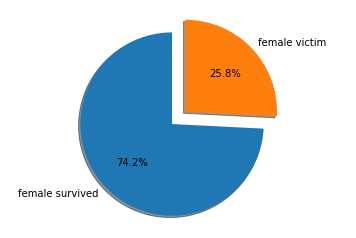

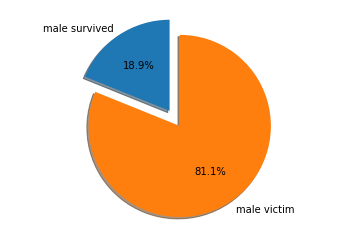

In [19]:
import matplotlib.pyplot as plt
#Finding out proportion of male and female who have survived by calculating the mean
grouping_by_sex=read_train.groupby('Sex')['Survived'].mean()
print grouping_by_sex
Female=grouping_by_sex.loc['female']
Female_victim=1-Female
Male=grouping_by_sex.loc['male']
Male_victim = 1-Male
Sex=['female survived','female victim']
sizes = [Female,Female_victim]
explode = (0, 0.2)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=Sex, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

sex1=['male survived','male victim']
sizes1=[Male,Male_victim]
explode1 =(0,0.2)
fig2 , ax2 =plt.subplots()
ax2.pie(sizes1, explode=explode1, labels=sex1, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')
plt.show()

From the above output, we can conclude that higher proportion of female has survived when compared to the male.The following might be the reason for it

1.Women might know well to handle such a situation than men.
2.Men might have given way for women to escape from the crisis.

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

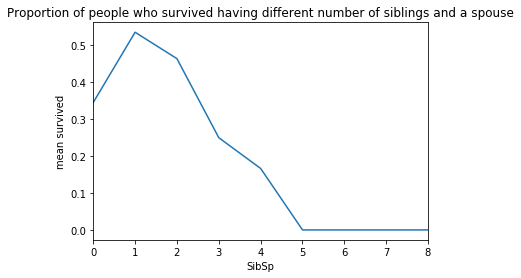

In [20]:

%matplotlib inline
from IPython.display import display
grouping_by_SibSpb=read_train.groupby('SibSp')['Survived'].mean()
display(grouping_by_SibSpb)
grouping_by_SibSpb.plot()
plt.ylabel('mean survived')
plt.title('Proportion of people who survived having different number of siblings and a spouse')



From the above data and the plot, we can conclude the people with more than 4 siblings and spouse have not survived. Some proportion of people with less than 4 sibling and spouse have survived.
But we can not reason out why it is like that because we have not gotten any pattern from the above data.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


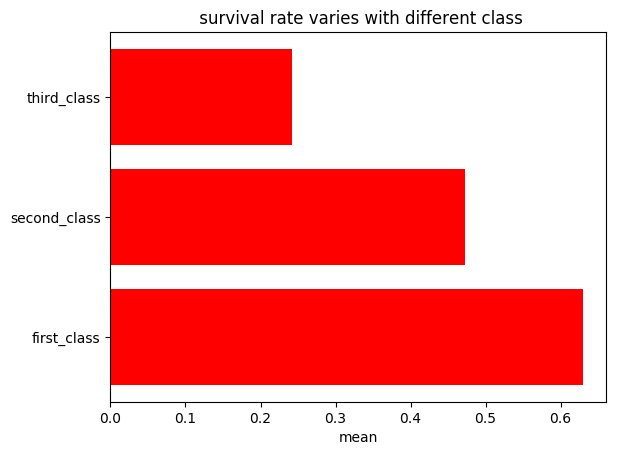

In [5]:
grouping_by_pclass=read_train.groupby('Pclass')['Survived'].mean()
print grouping_by_pclass
first_class=grouping_by_pclass.loc[1]
second_class=grouping_by_pclass.loc[2]
third_class=grouping_by_pclass.loc[3]
plt.rcdefaults()
fig, ax = plt.subplots()
people = ('first_class', 'second_class', 'third_class')
y_pos=np.arange(len(people))
mean = np.array([first_class,second_class,third_class])
ax.barh(y_pos, mean, align='center',color='red', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('mean')
ax.set_title(' survival rate varies with different class')
plt.show()


From the above data and plot, we can conclude that the proportion of people who have survived is high in 1st class, it is the lowest for 3rd class and 2nd class in the middle. This might be because of the following reasons
1.1st class people might be given preference to escape from the ship followed by 2nd and 3rd people.
2.1st class might know how to escape from the ship than the 2nd and 3rd class people.

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


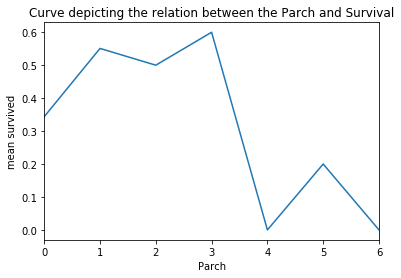

In [22]:
%matplotlib inline
grouping_by_Parch=read_train.groupby('Parch')
mean= grouping_by_Parch['Survived'].mean()
mean.plot()
plt.title('Curve depicting the relation between the Parch and Survival')
plt.ylabel('mean survived')
print mean


From the above data and plot, we can conclude that the people with 4 and 6 number of children and parents have not survived. But some proportion of people with other than 4 and 6 number of children and parents have survived.
We cannot find any exact correlation between 'survived' and 'parch' since they don't have any patterns.

In [23]:
import pandas as pd
import numpy as np
from IPython.display import display
read_train= pd.read_csv('train.csv')
age_less_than_twenty=read_train['Age']<20
less_than_twenty=read_train[age_less_than_twenty]
#Calculating the sum and mean of the people's survival whose age is less than 20 and have survived
#Sum gives number of people survived 
#Mean in this case gives proportion of people survived

less_than_twenty_grouping_by_Survived_sum=less_than_twenty['Survived'].sum()
less_than_twenty_grouping_by_Survived_mean=less_than_twenty['Survived'].mean()
print less_than_twenty_grouping_by_Survived_mean
print less_than_twenty_grouping_by_Survived_sum



0.481707317073
79


In [24]:
age_less_than_forty=read_train['Age']<40
age_greater_than_nineteen=read_train['Age']>19
# found out the sum and mean of  the people's survival whose age is  than 40 and greater than 19 

age_less_than_forty_and_greater_than_nineteen= age_less_than_forty & age_greater_than_nineteen
data_less_than_forty_and_greater_than_nineteen=read_train[age_less_than_forty_and_greater_than_nineteen]
get_data_for_sum_of_survived=data_less_than_forty_and_greater_than_nineteen['Survived'].sum()
get_data_for_mean_of_survived=data_less_than_forty_and_greater_than_nineteen['Survived'].mean()
print get_data_for_sum_of_survived
print get_data_for_mean_of_survived


150
0.387596899225


In [80]:
age_greater_than_thirtynine=read_train['Age']>39
#calculated the sum and mean of the people's survival whose age is greater than 39

data_for_age_greater_than_thirtynine=read_train[age_greater_than_thirtynine]['Survived'].sum()
mean_for_age_greater_than_thirtynine=read_train[age_greater_than_thirtynine]['Survived'].mean()
print mean_for_age_greater_than_thirtynine
print data_for_age_greater_than_thirtynine




0.374233128834
61


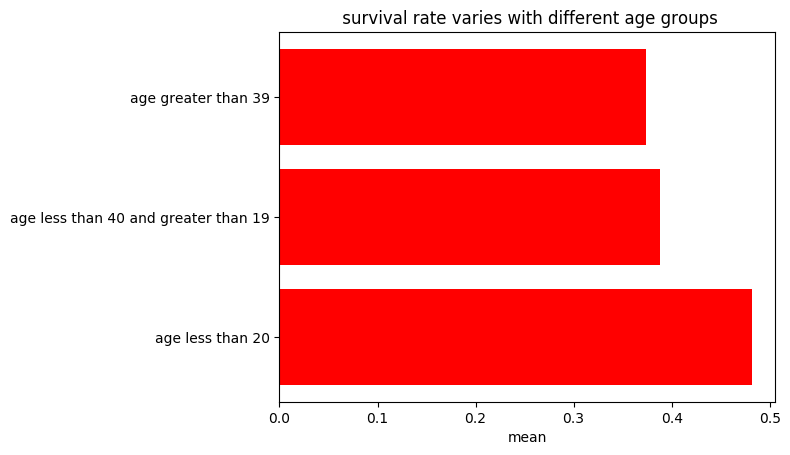

In [25]:
#plotted the bar graph taking into consideration of mean of each and every age category above and seeing how the mean of survival differs

#across various age groups

import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

people = ('age less than 20', 'age less than 40 and greater than 19', 'age greater than 39')
y_pos=np.arange(len(people))
mean = np.array([0.481707317073,0.387596899225,0.374233128834])
ax.barh(y_pos, mean, align='center',color='red', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('mean')
ax.set_title(' survival rate varies with different age groups')
plt.show()


With the available(did not add any numbers in the missing cell) data in 'Age' column ,in the above four cells, I have grouped the whole data with the 'Age' classifying people with the age less than 20, between 19 and 39, greater than 39 . For each of the grouped data, I calculated the proportion of people who have survived in the range and plotted the curve for it. The analysis could be different if there is sufficient data for all the people on Titanic. But with the available data and the analysis, we can conclude that the proportion of people who have survived with the age less than 20 is high, least for the age greater than 39. This could be due to

1.ELderly people might have given way to the people with less age to escape from the ship.